## Boundary

In [1]:
! pip install pykml
! pip install rioxarray
! pip install Shapely
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 118 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 9.6 MB/s 
     |████████████████████████████████| 6.3 MB 23.7 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=96eddefa3b2633faf945219b76262767d20d664e384eeefce29172afc5acadbd
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-p

In [2]:
from pykml import parser
import csv
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
kml_file = r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_cropping/NY_kml/cb_2016_36_tract_500k.kml"

In [5]:
with open(kml_file) as f:
    folder = parser.parse(f).getroot().Document.Folder

In [6]:
# for i in folder.Placemark:
#   try:
#     print(i.ExtendedData.SchemaData.SimpleData[4].text)
#   except:
#     continue

In [7]:
boundary_result = {}

for pm in folder.Placemark:
    try:
        cor_text = pm.Polygon.outerBoundaryIs.LinearRing.coordinates.text
        geo_id = pm.ExtendedData.SchemaData.SimpleData[4].text
        cor_text_lst = cor_text.replace('0.0','').rstrip(',').split(',')
        pointer0 = 0
        pointer1 = 1
        cor_lst = []

        for i in range(len(cor_text_lst)):
            if i + pointer0 <= len(cor_text_lst) - 2:
                cor_lst.append((float(cor_text_lst[i+pointer0]), float(cor_text_lst[i+pointer1])))
                pointer0 += 1
                pointer1 += 1
        boundary_result[geo_id] = cor_lst
    except:
        pass

In [8]:
len(boundary_result)

4891

In [9]:
boundary_result

{'36001000100': [(-73.74506, 42.672279),
  (-73.745489, 42.670923),
  (-73.743362, 42.665549),
  (-73.744124, 42.663822),
  (-73.743392, 42.663566),
  (-73.743899, 42.662171),
  (-73.74166, 42.660655),
  (-73.74283, 42.658936),
  (-73.739429, 42.656803),
  (-73.730864, 42.663279),
  (-73.729127, 42.665052),
  (-73.724964, 42.670179),
  (-73.723263, 42.672879),
  (-73.732619, 42.67597),
  (-73.742978, 42.679275),
  (-73.743117, 42.679323),
  (-73.743737, 42.677112),
  (-73.74506, 42.672279)],
 '36001000200': [(-73.759932, 42.659968),
  (-73.761745, 42.658177),
  (-73.758936, 42.657615),
  (-73.756806, 42.656376),
  (-73.754756, 42.655187),
  (-73.753339, 42.654307),
  (-73.751621, 42.652998),
  (-73.750875, 42.652557),
  (-73.750031, 42.654244),
  (-73.749727, 42.656209),
  (-73.749265, 42.658246),
  (-73.744247, 42.663496),
  (-73.744124, 42.663822),
  (-73.743362, 42.665549),
  (-73.745489, 42.670923),
  (-73.74506, 42.672279),
  (-73.743737, 42.677112),
  (-73.746537, 42.67648),
  (-

In [10]:
from shapely.geometry import Polygon
dic = {'tract_id':[],'area':[]}
for k,v in boundary_result.items():
  dic['tract_id'].append(k)
  dic['area'].append(Polygon(v).area)

In [11]:
df = pd.DataFrame(dic)
df

,tract_id,area
0,36001000100,0.000286
1,36001000200,0.000226
2,36001000300,0.000643
3,36001000401,0.001003
4,36001000403,0.000344
...,...,...
4886,36123150100,0.027273
4887,36123150200,0.015010
4888,36123150300,0.037905
4889,36123150400,0.009530


In [12]:
%cd /content/drive/My Drive/Colab Notebooks/object_detection/

/content/drive/My Drive/Colab Notebooks/object_detection


In [13]:
df.to_csv('nyc_tract_area.csv',index=False)

## Plot one instance

In [ ]:
tract_geo = '36119014901'
poly = boundary_result[tract_geo]

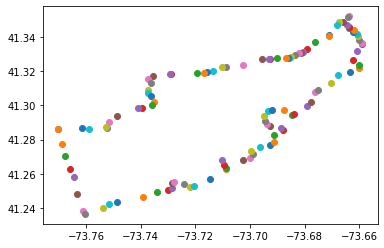

In [ ]:
for i, j in poly:
    plt.scatter(i, j)

In [ ]:
poly

[(-73.770235, 41.286145),
 (-73.768764, 41.277282),
 (-73.767535, 41.270575),
 (-73.765699, 41.262876),
 (-73.764528, 41.258019),
 (-73.763234, 41.248323),
 (-73.761101, 41.238401),
 (-73.760369, 41.236411),
 (-73.753777, 41.239996),
 (-73.751732, 41.242056),
 (-73.748558, 41.243559),
 (-73.739108, 41.246185),
 (-73.734192, 41.249148),
 (-73.729834, 41.250445),
 (-73.728392, 41.251507),
 (-73.728382, 41.254633),
 (-73.727741, 41.254846),
 (-73.724173, 41.253694),
 (-73.722067, 41.252046),
 (-73.720572, 41.252601),
 (-73.71447, 41.256747),
 (-73.708914, 41.262816),
 (-73.708792, 41.263304),
 (-73.709372, 41.265112),
 (-73.710257, 41.267813),
 (-73.702412, 41.268082),
 (-73.699894, 41.26911),
 (-73.698963, 41.271492),
 (-73.699482, 41.273217),
 (-73.696385, 41.275605),
 (-73.692754, 41.276618),
 (-73.690999, 41.2788),
 (-73.691136, 41.282897),
 (-73.687916, 41.285598),
 (-73.688557, 41.28688),
 (-73.692617, 41.287773),
 (-73.693793, 41.288962),
 (-73.694433, 41.291052),
 (-73.694662, 41.

In [ ]:
top_lat = max(poly, key=lambda  x:x[1])[1]
bottom_lat = min(poly, key=lambda x:x[1])[1]
right_lon = max(poly, key=lambda  x:x[0])[0]
left_lon = min(poly, key=lambda  x:x[0])[0]

In [ ]:
print(left_lon, right_lon, top_lat, bottom_lat)

-73.770235 -73.658817 41.352287 41.236411


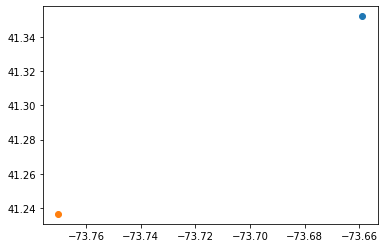

In [ ]:
plt.scatter(right_lon, top_lat)
plt.scatter(left_lon, bottom_lat)

## Crop the images

In [ ]:
import os
import rioxarray
import geopandas as gpd
from shapely.geometry import Polygon
import cv2

In [ ]:
path = r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/NYC/raw"
destination = r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/NYC/cropped"

In [ ]:
categories = os.listdir(path)

In [ ]:
exclude_image = ['36005051600.png','36061000500.png','36061000700.png','36061000900.png','36085022300.png','36085022600.png','36085990100.png']

In [ ]:
large_image = ['36081071600.png','36081107202.png','36047070203.png']

In [ ]:
error_img = []

for c in categories:
  imgs = os.path.join(path, c)
  for img in os.listdir(imgs):
    # crop each image
    png = img.strip('.tif') + '.png'
    #png1 has too 2 polygon and png2 is too large to crash
    if png in os.listdir(os.path.join(destination, c)) or png in exclude_image or png in large_image:
      continue
    try:
      print(png)
      raster = rioxarray.open_rasterio(os.path.join(imgs, img))
      polygon_geom = Polygon(boundary_result[img.strip('.tif')])
      polygon = gpd.GeoDataFrame(index=[0], crs=raster.rio.crs, geometry=[polygon_geom])
      raster_clip_polygon = raster.rio.clip(polygon['geometry'], polygon.crs)
      # save each image
      img_np = raster_clip_polygon.to_numpy()
      img_arr = np.moveaxis(img_np, 0, -1)
      folder = os.path.join(destination, c)
      cv2.imwrite(os.path.join(folder, img.strip('.tif') + '.png'), cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR))
    except:
      error_img.append(os.path.join(imgs, img))
      pass

36081091601.png
36081094202.png
36081094203.png
36081097203.png
36081099200.png
36081099801.png
36081099802.png
36081101001.png
36081103201.png
36081114100.png
36081116100.png
36081120500.png
36081122702.png
36081126500.png
36081129102.png
36081133900.png
36081140902.png
36081148300.png
36081152902.png
36081157902.png
36085000700.png
36085001800.png
36085002900.png
36085004000.png
36085007700.png
36085008100.png
36085011201.png
36085012100.png
36085012500.png
36085013301.png
36085029102.png
36085031901.png
36085031902.png


In [ ]:
len(os.listdir(os.path.join(destination, categories[0])))

1631

In [ ]:
len(os.listdir(os.path.join(destination, categories[1])))

524

In [ ]:
len(os.listdir(os.path.join(path, categories[0])))

1634

In [ ]:
len(os.listdir(os.path.join(path, categories[1])))

524

In [ ]:
1425-1394

31

In [ ]:
len(large_image)

3

In [ ]:
# import rioxarray

# # Load image and visualize
# raster = rioxarray.open_rasterio(r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/LA/raw/non-gentrified/06037980015.tif")
# raster.plot.imshow()

In [ ]:
# import geopandas as gpd
# from shapely.geometry import Polygon

In [ ]:
# polygon_geom = Polygon(poly)

In [ ]:
# polygon = gpd.GeoDataFrame(index=[0], crs=raster.rio.crs, geometry=[polygon_geom])

In [ ]:
# # Plot the polygon over raster
# fig, ax = plt.subplots()
# fig.set_size_inches((8,8))
# raster.plot.imshow(ax=ax)
# polygon.plot(ax=ax, edgecolor='blue', alpha=0.6)

In [ ]:
# # Crop and visualize
# raster_clip_polygon = raster.rio.clip(polygon['geometry'], polygon.crs)
# raster_clip_polygon.plot.imshow(figsize=(10,5))

## Save the cropped image

In [ ]:
# type(raster_clip_polygon)

In [ ]:
# # change the data to numpy array

# img_np = raster_clip_polygon.to_numpy()
# type(img_np), img_np.shape

In [ ]:
# # reshape the data to make the channel at the last axis

# img_arr = np.moveaxis(img_np, 0, -1)
# img_arr.shape

In [ ]:
# # save the numpy array to image file

# import cv2

# cv2.imwrite('test.png', cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR))